In [ ]:
# Refer FeatureEngineering.pptx - from DATA directory

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Create dataset
data = {
    'size_sqft': [1200, 1500, 800, 950, 1100],
    'num_rooms': [3, 4, 2, 2, 3],
    'city': ['Delhi', 'Mumbai', 'Delhi', 'Chennai', 'Mumbai'],
    'built_year': [2015, 2010, 2018, 2012, 2014],
    'price': [75, 120, 60, 55, 100]
}
df = pd.DataFrame(data)
print("Original Data:\n", df)

# Step 2: Create new features
df['house_age'] = 2025 - df['built_year']             # years since built
df['price_per_sqft'] = df['price'] / df['size_sqft']  # derived metric

# Step 3: Encode categorical feature
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[['city']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['city']))

df = pd.concat([df, encoded_df], axis=1)
df.drop(columns=['city'], inplace=True)

# Step 4: Scale numerical features
scaler = StandardScaler()
numeric_cols = ['size_sqft', 'num_rooms', 'built_year', 'house_age', 'price_per_sqft']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("\nEngineered and Transformed Data:\n", df)


Original Data:
    size_sqft  num_rooms     city  built_year  price
0       1200          3    Delhi        2015     75
1       1500          4   Mumbai        2010    120
2        800          2    Delhi        2018     60
3        950          2  Chennai        2012     55
4       1100          3   Mumbai        2014    100

Engineered and Transformed Data:
    size_sqft  num_rooms  built_year  price  house_age  price_per_sqft  \
0   0.378968   0.267261    0.442326     75  -0.442326       -0.901872   
1   1.642196   1.603567   -1.400699    120   1.400699        0.564823   
2  -1.305335  -1.069045    1.548141     60  -1.548141        0.145767   
3  -0.673722  -1.069045   -0.663489     55   0.663489       -1.287844   
4  -0.042108   0.267261    0.073721    100  -0.073721        1.479126   

   city_Chennai  city_Delhi  city_Mumbai  
0           0.0         1.0          0.0  
1           0.0         0.0          1.0  
2           0.0         1.0          0.0  
3           1.0         0.

In [ ]:
Automating with Scikit-learn Pipeline

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

# Define columns
num_features = ['size_sqft', 'num_rooms', 'built_year']
cat_features = ['city']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(), cat_features)
])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

X = df[['size_sqft', 'num_rooms', 'built_year', 'city']]
y = df['price']

model.fit(X, y)
print("Model trained successfully!")


Model trained successfully!


In [ ]:
Full Workflow Overview

In [ ]:
raw data → feature engineering → model training → evaluation → feature importance visualization.

Model Evaluation:
Mean Absolute Error: 10.85
R² Score: -19.42


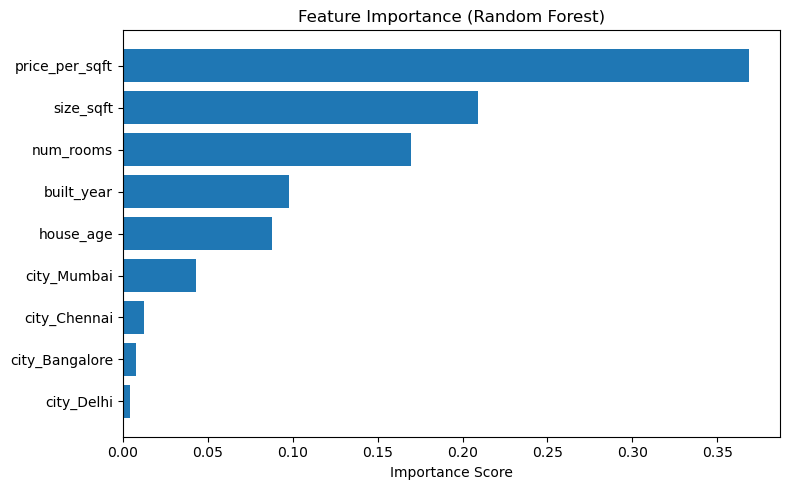

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# ------------------------
# Step 1: Create Dataset
# ------------------------
data = {
    'size_sqft': [1200, 1500, 800, 950, 1100, 1600, 1300, 700, 1450, 1000],
    'num_rooms': [3, 4, 2, 2, 3, 4, 3, 1, 4, 2],
    'city': ['Delhi', 'Mumbai', 'Delhi', 'Chennai', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Mumbai', 'Bangalore'],
    'built_year': [2015, 2010, 2018, 2012, 2014, 2011, 2016, 2019, 2009, 2013],
    'price': [75, 120, 60, 55, 100, 130, 80, 45, 125, 70]
}
df = pd.DataFrame(data)

# ------------------------
# Step 2: Feature Engineering
# ------------------------
df['house_age'] = 2025 - df['built_year']             # how old the house is
df['price_per_sqft'] = df['price'] / df['size_sqft']  # derived metric

# ------------------------
# Step 3: Define Features and Target
# ------------------------
X = df[['size_sqft', 'num_rooms', 'city', 'built_year', 'house_age', 'price_per_sqft']]
y = df['price']

# ------------------------
# Step 4: Train/Test Split
# ------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------
# Step 5: Preprocessing Pipeline
# ------------------------
num_features = ['size_sqft', 'num_rooms', 'built_year', 'house_age', 'price_per_sqft']
cat_features = ['city']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(), cat_features)
])

# ------------------------
# Step 6: Model Pipeline (Random Forest)
# ------------------------
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# ------------------------
# Step 7: Train Model
# ------------------------
model.fit(X_train, y_train)

# ------------------------
# Step 8: Evaluate
# ------------------------
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# ------------------------
# Step 9: Feature Importance
# ------------------------
# Extract feature names from preprocessor
num_names = num_features
cat_names = model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(cat_features)
feature_names = np.concatenate([num_names, cat_names])

# Extract importance from RandomForest
importances = model.named_steps['regressor'].feature_importances_

# Sort by importance
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8, 5))
plt.title("Feature Importance (Random Forest)")
plt.barh(range(len(importances)), importances[indices][::-1], align='center')
plt.yticks(range(len(importances)), feature_names[indices][::-1])
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()
